# LP Transshipment model

In [4]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Create a Concrete Model
model = ConcreteModel()

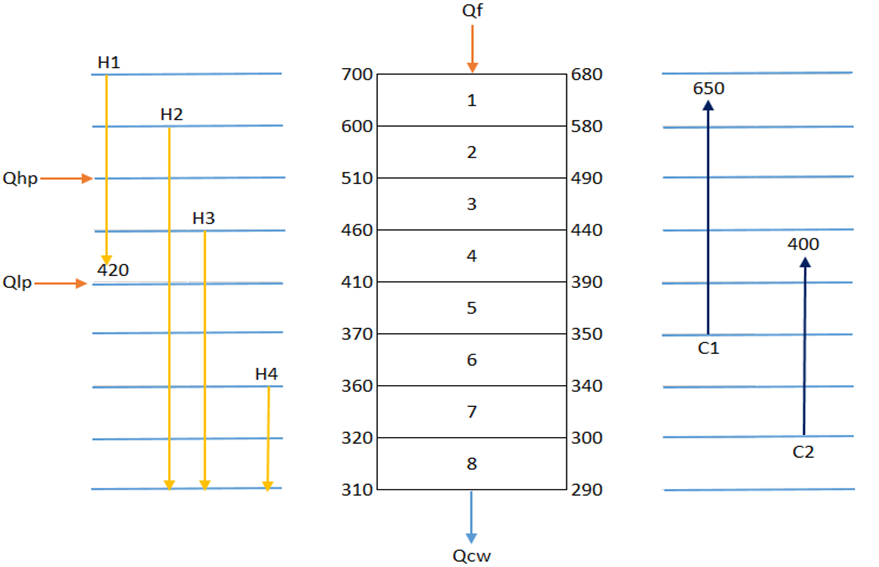

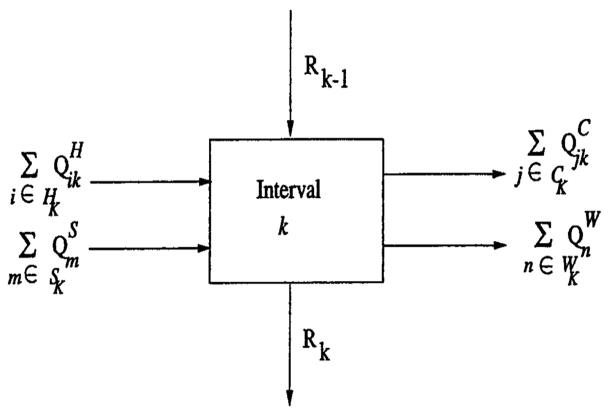

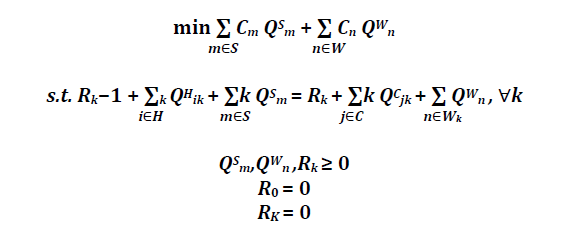

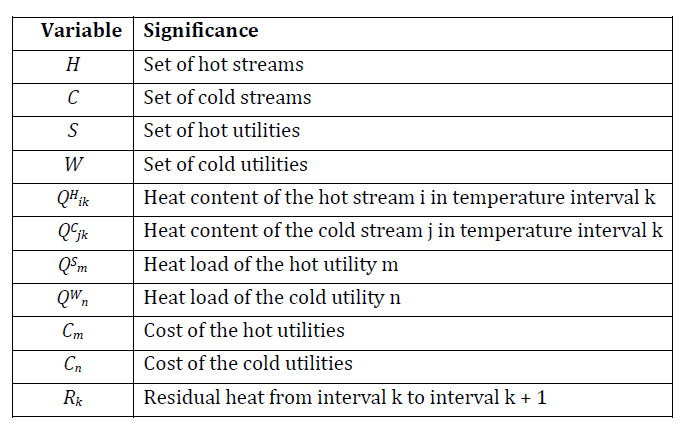

In [5]:
# Define variables
model.Qf = Var(domain=NonNegativeReals)
model.Qhp = Var(domain=NonNegativeReals)
model.Qlp = Var(domain=NonNegativeReals)
model.Qcw = Var(domain=NonNegativeReals)
R_vars = [f'R{i}' for i in range(1, 8) ]  
for var in R_vars:
    model.add_component(var, Var(domain=NonNegativeReals))

In [6]:
# Define constraints
model.constraints = ConstraintList()
model.constraints.add(expr=model.R1 - model.Qf == -1500)
model.constraints.add(expr=model.R2 - model.R1 == 900)
model.constraints.add(expr=model.R3 - model.R2 - model.Qhp == 500)
model.constraints.add(expr=model.R4 - model.R3 == 2000)
model.constraints.add(expr=model.R5 - model.R4 - model.Qlp == -4800)
model.constraints.add(expr=model.R6 - model.R5 == -700)
model.constraints.add(expr=model.R7 - model.R6 == 960)
model.constraints.add(expr=model.R7 - model.Qcw == -2040)

def qhp_bounds_rule(model):
    return 0, model.Qhp, 1000
model.con_qhp_bounds = Constraint(rule=qhp_bounds_rule)

def qlp_bounds_rule(model):
    return 0, model.Qlp, 500
model.con_qlp_bounds = Constraint(rule=qlp_bounds_rule)

In [7]:
# Define the objective function & Solver
model.objective = Objective(expr=144 * model.Qf + 86.4 * model.Qhp + 51.84 * model.Qlp + 20.16 * model.Qcw, sense=minimize)
opt = SolverFactory('ipopt', executable="C:\\Users\\Dell\\anaconda3\\pkgs\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt")

# Solve the optimization problem
opt.solve(model, tee=True)

# Display optimal values and objective
print("Optimal Values:")
for var in ['Qf', 'Qcw', 'Qhp', 'Qlp'] + [f'R{i}' for i in range(1, 8)]:
    print(f"{var}: {value(getattr(model, var))}")

print("Optimal objective value:", value(model.objective))

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:       18
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       11
                     variables with only lower bounds:       11
                variables with lower and upper bounds:        0
